# Project: Real estate market analysis of the City of Buenos Aires

In this project we are going to work with a dataset of properties for sale published in the portal [Properati](www.properati.com.ar). 

We are going to focus on analyzing some aspects of the real estate market in the City of Buenos Aires, but for that, we must first clean up the dataset a bit.

## The dataset: properties for sale in the City of Buenos Aires.

In this project, we will be working with a sample of the property for sale dataset mentioned above. In this dataset, each row is a property for sale.

## The attributes
Next we will describe the attributes that we consider in this sample:

* **id**: property id
* **created_on**: date the property entered the site
* **operation**: rent (rent) or sale (sell)
* **property_type**: type of property (house, apartment, townhouse, etc.)
* **place_with_parent_names** - name of the place where the property is located according to the publisher
* **lat-lon**: concatenated coordinates
* **lat**: latitude
* **lon**: length
* **price**: price in the currency specified in currency
* **currency**: currency in which the publication is expressed
* **price_aprox_usd**: approximate price in US dollars
* **surface_total_in_m2**: total area (in square meters)
* **surface_covered_in_m2**: surface covered (in square meters)
* **price_usd_per_m2**: price per square meter in dollars (dollar price / area)
* **floor**: floor number (if applicable)
* **rooms**: number of environments
* **expenses**: expenses (if applicable)
* **neighborhood**: neighborhood according to official cartography
* **properati_url**: url of the publication in Properati


## Importing the necessary libraries

In order to work on data cleaning and visualization of our dataset we are going to use the numpy, pandas, matplotlib.pylab and seaborn libraries.

- **numpy** as **np**
- **pandas** as **pd**
- **matplotlib.pylab** as **plt**
- **seaborn** as **sns**


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
# The next line is to see the images inside the notebook
%matplotlib inline
# We configure the size of the figures
plt.rcParams['figure.figsize'] = (12,8)
# We set pandas options on the columns and their width
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Loading property dataset


In [46]:
df=pd.read_csv("dataset/datos_properati.csv",parse_dates=["created_on"])
df

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.00,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.00,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.00,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,2018-01-08,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.668741,-58.443146",-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_departamento_villa-soldati_roca-cnel-av-_3500_subte-premetro_re-max-parque,VILLA SOLDATI,8.0
18975,2018-01-23,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.66417,-58.443317",-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_villa-soldati_lavadero_parrilla_terraza_garage_placard_subte-premetro_re-max-acci-oacute-n,VILLA SOLDATI,8.0
18976,2018-01-24,sell,store,|Argentina|Capital Federal|Villa Soldati|,"-34.6618136,-58.426504",-34.661814,-58.426504,3300000.00,NaN,4162.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1k1mv_venta_local_villa-soldati_aire-acondicionado_ana-simeone-inmuebles-corporativos_9ia,VILLA SOLDATI,8.0
18977,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.665005,-58.443041",-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_departamento_villa-soldati_lavadero_subte-premetro_re-max-ayres,VILLA SOLDATI,8.0


## Data exploration

In [47]:
print(df.shape)
df.head(3)

(18979, 17)


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.25641,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.92562,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.47541,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0


## Property Categories
Let's first see what categories exist in the `property_type` field. And of those categories, how many values do we have of each one.

In [48]:
df["property_type"].value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Filtering the categories

Of the existing categories we only want to keep those that are houses (house), departments (apartment) or PH (PH). 

In [49]:
df_filtered=df[df.property_type!="store"]
df_filtered

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,2017-12-17,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.66897,-58.443897",-34.668970,-58.443897,49000.00,75.0,75.0,653.333333,NaN,4.0,NaN,https://www.properati.com.ar/1j22x_venta_departamento_villa-soldati_re-max-parque,VILLA SOLDATI,8.0
18974,2018-01-08,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.668741,-58.443146",-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_departamento_villa-soldati_roca-cnel-av-_3500_subte-premetro_re-max-parque,VILLA SOLDATI,8.0
18975,2018-01-23,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.66417,-58.443317",-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_villa-soldati_lavadero_parrilla_terraza_garage_placard_subte-premetro_re-max-acci-oacute-n,VILLA SOLDATI,8.0
18977,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.665005,-58.443041",-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_departamento_villa-soldati_lavadero_subte-premetro_re-max-ayres,VILLA SOLDATI,8.0


### Viewing the categories

<AxesSubplot:xlabel='property_type', ylabel='count'>

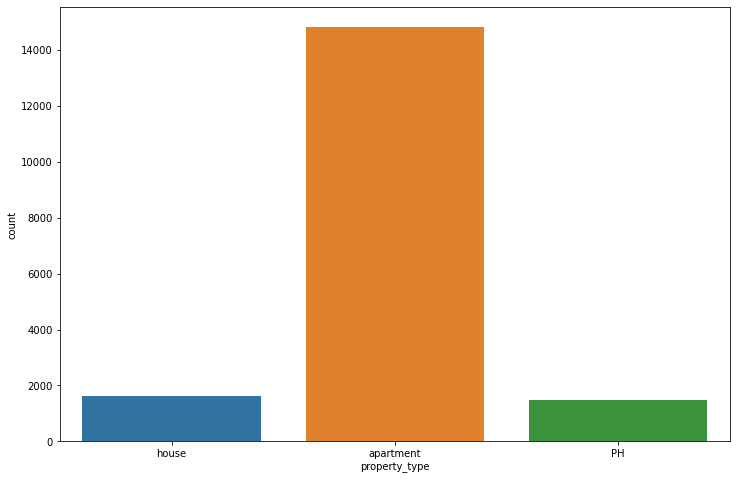

In [50]:
sns.countplot(x="property_type", data=df_filtered)

## Missing Values

In [51]:
#I remove the null values from the cells that I consider important.
df_filtered=df_filtered.dropna(subset=["surface_total_in_m2","surface_covered_in_m2","rooms","price_aprox_usd","price_usd_per_m2"])
df_filtered

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.00,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,2017-12-17,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.66897,-58.443897",-34.668970,-58.443897,49000.00,75.0,75.0,653.333333,NaN,4.0,NaN,https://www.properati.com.ar/1j22x_venta_departamento_villa-soldati_re-max-parque,VILLA SOLDATI,8.0
18974,2018-01-08,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.668741,-58.443146",-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_departamento_villa-soldati_roca-cnel-av-_3500_subte-premetro_re-max-parque,VILLA SOLDATI,8.0
18975,2018-01-23,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.66417,-58.443317",-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_villa-soldati_lavadero_parrilla_terraza_garage_placard_subte-premetro_re-max-acci-oacute-n,VILLA SOLDATI,8.0
18977,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.665005,-58.443041",-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_departamento_villa-soldati_lavadero_subte-premetro_re-max-ayres,VILLA SOLDATI,8.0


In [52]:
#Number of instances dropped
df.shape[0]-df_filtered.shape[0]

7004

There may be other attributes with missing values in the dataset, but they are not as important.

In [53]:
df_filtered.isna().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
floor                      10112
rooms                          0
expenses                    9703
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

## Studying neighborhoods

### Neighborhoods with more buildings and neighborhoods with more houses
By knowing which neighborhoods have the most buildings for sale and which have the most houses, we can get an idea of what type of neighborhood it is. If it is more residential, with more population, purchasing power, etc.
For that we are going to start by calculating the percentages of each type of property according to the neighborhood.

In [54]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count().values

In [55]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [56]:
print("Neighborhoods with the highest percentage of buildings: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Neighborhoods with the highest percentage of houses and ph: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Neighborhoods with the highest percentage of buildings: 
 barrio
PUERTO MADERO    0.996154
RETIRO           0.992925
SAN NICOLAS      0.988827
RECOLETA         0.988362
BELGRANO         0.956316
Name: property_type, dtype: float64
Neighborhoods with the highest percentage of houses and ph: 
  barrio
VERSALLES            0.622222
MATADEROS            0.612500
PARQUE AVELLANEDA    0.560606
VILLA RIACHUELO      0.555556
VILLA REAL           0.500000
Name: property_type, dtype: float64


To give us an idea of the differences between the percentages of buildings and houses in these neighborhoods, we are going to graph them in cake form.

<AxesSubplot:ylabel='property_type'>

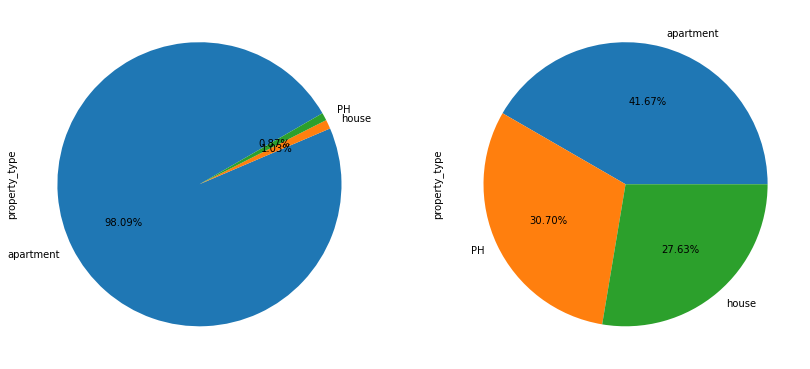

In [57]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### More expensive and cheaper neighborhoods

Let's first look at the distribution of price per square meter for the entire dataset. In this way, we are going to remove values that we consider extreme.

In [58]:
print(df_filtered["price_usd_per_m2"].max())
print(df_filtered["price_usd_per_m2"].min())
print(df_filtered["price_usd_per_m2"].mean())
print(df_filtered["price_usd_per_m2"].median())
print(df_filtered["price_usd_per_m2"].std())

142450.14102564106
0.9583333333333334
2819.156920248089
2611.7
1951.6291554142326


We can also calculate other statistics such as quartiles.

In [59]:
print(np.percentile(df_filtered["price_usd_per_m2"],25))
print(np.percentile(df_filtered["price_usd_per_m2"],75))
print("Interquartile range:", np.percentile(df_filtered["price_usd_per_m2"],75)-np.percentile(df_filtered["price_usd_per_m2"],25))

2069.605943152455
3226.5395894428157
Interquartile range: 1156.9336462903607


### Removing extreme values
Let's eliminate those observations whose price per square meter is outside the 10th and 90th percentiles. In this way we will try to remove extreme values in a simple way to have a more robust analysis.

In [60]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

In [61]:
print(df_filtered["price_usd_per_m2"].max())
print(df_filtered["price_usd_per_m2"].min())
print(df_filtered["price_usd_per_m2"].mean())
print(df_filtered["price_usd_per_m2"].median())
print(df_filtered["price_usd_per_m2"].std())

4148.936170212766
1590.909090909091
2660.0457747070814
2611.1111111111118
606.9900840157425


We are now going to graph the neighborhoods according to the price per square meter.

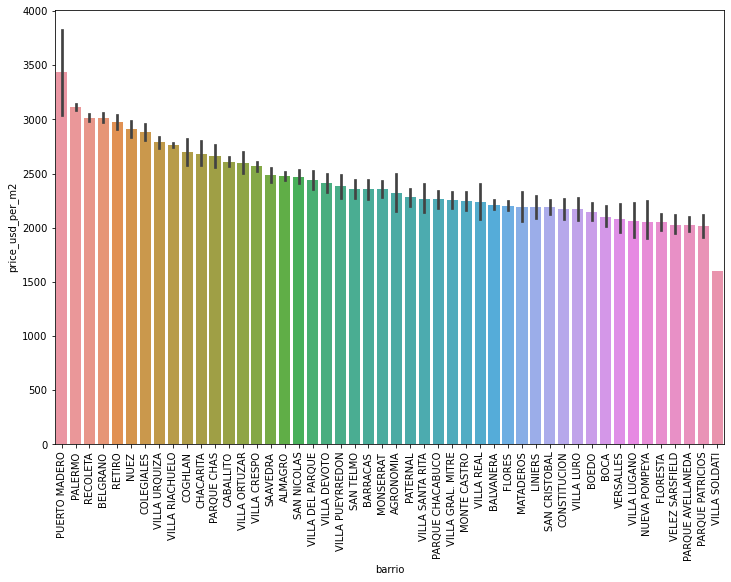

In [62]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### More expensive

In [63]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Cheaper

In [64]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


## Plotting neighborhood properties

Now that we know which neighborhoods are the most expensive and which are the cheapest, we are going to see some graphical comparisons to better understand their differences in different attributes of the dataset. Let's see the distributions according to:
- Total area in m2
- Total rooms
- Price in dollars per m2

In [65]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

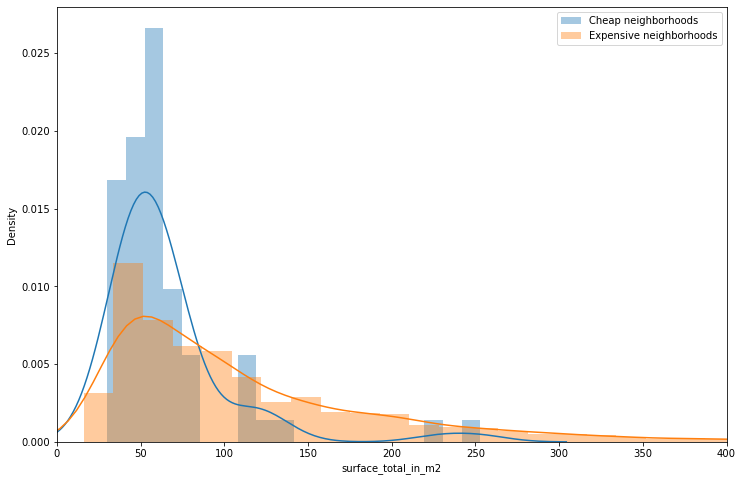

In [66]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Cheap neighborhoods")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Expensive neighborhoods")
g.set_xlim(0, 400)
plt.legend()

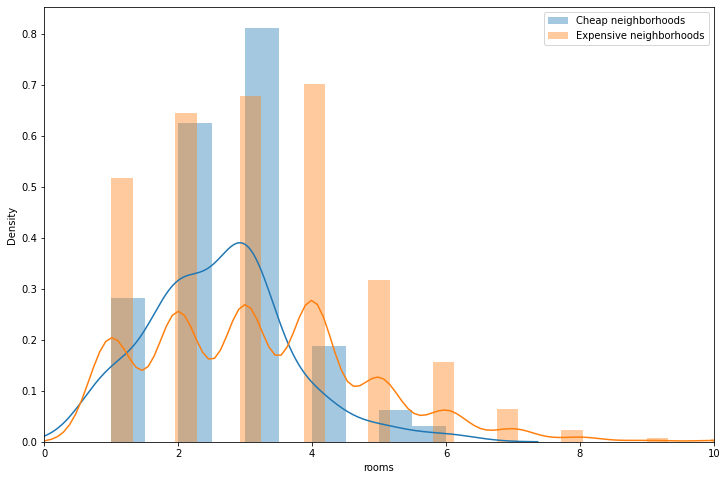

In [67]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Cheap neighborhoods")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Expensive neighborhoods")
g.set_xlim(0, 10)
plt.legend()

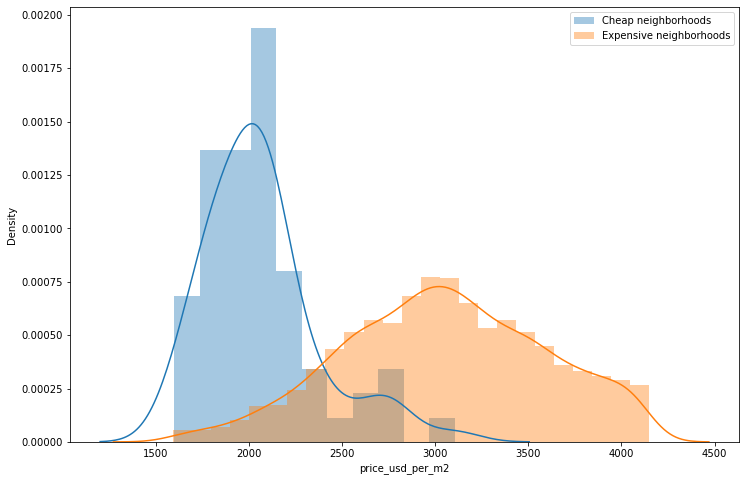

In [69]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Cheap neighborhoods")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Expensive neighborhoods")
plt.legend()